In [1]:
# Libraries:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Config:
# In order to display all the columns:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30

### Importing datasets:

In [3]:
# Training set:
filepath="train.csv" 
data=pd.read_csv(filepath)
# Training set:
filepath_val="validation.csv"
data_val=pd.read_csv(filepath_val)
# Testing set:
filepath_test="test.csv"
data_test=pd.read_csv(filepath_test)

In [4]:
# Functions for analysing data:
def print_different_values(dataframe):
    print ("total number of datapoints : "+str(len(dataframe)))
    for i in dataframe.columns:
        set_col=len(dataframe[i].value_counts())
        print ("%s has %d different points." %(i,set_col))

In [5]:
# Ploting:

# Groupby functions:
def plot_ctr(dataframe,y,x,list_advert_tot):
    adv="advertiser"
    # Mean time series:
    plt.figure(figsize=(9,9))
    for list_advert in list_advert_tot:
        mean_data=data.groupby([x,adv]).mean()
        ts_mean=mean_data.unstack(adv)[y][list_advert]

        # STD:
        std_data=data.groupby([x,adv]).std()
        ts_std=std_data.unstack(adv)[y][list_advert]

        # Totals:
        totals=data.groupby([x,adv]).count()
        ts_totals=totals.unstack(adv)[y][list_advert]

        # margin:
        margin=ts_std*2/np.sqrt(ts_totals)
        plt.errorbar(x=ts_mean.index,y=ts_mean, yerr=margin,fmt='--o')
    plt.legend(list_advert_tot, loc=0)
    plt.ylabel(y)
    plt.xlabel(x)

In [6]:
# Analising:
print (len(data.columns))
data.head()

26


,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,2,trqRTuToMTNUjM9r5rMi,d48a96ab59d7ad741a48e781de44efeb,null,433287550,468,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,2,trqRTv14MqTR1m58uG,313e110c149d24b3236165d30879c595,null,2264242698,250,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,1,trqRTJTxX5scg4,845b72208c27b993daa11c8104449e22,null,mm_40135906_3486753_11388735,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,2,trqRTuMvjTN7X9KbuKz,ea6709db2703ae8698755629f1f9df32,null,2536830969,728,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,1,trqRTu1YP5scFsf,b7b8e74eefbdd5cc1a9f0acb2e5c0d6c,null,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [7]:
# Number of different values for each column:
print_different_values(data)

total number of datapoints : 2697738
click has 2 different points.
weekday has 7 different points.
hour has 24 different points.
bidid has 2697738 different points.
logtype has 1 different points.
userid has 2591064 different points.
useragent has 39 different points.
IP has 515530 different points.
region has 35 different points.
city has 370 different points.
adexchange has 5 different points.
domain has 24087 different points.
url has 833453 different points.
urlid has 1 different points.
slotid has 55983 different points.
slotwidth has 21 different points.
slotheight has 14 different points.
slotvisibility has 11 different points.
slotformat has 4 different points.
slotprice has 284 different points.
creative has 130 different points.
bidprice has 8 different points.
payprice has 301 different points.
keypage has 19 different points.
advertiser has 9 different points.
usertag has 814364 different points.


In [8]:
# Basic Analysis:
# Num click:
num_clics=len(data[data.click==1])
print ("num_clics: %d"%num_clics)
# number of impressions:
num_impressions=len(data)
print ("num_clics: %d"%num_impressions)
# Click through Rate: number of Clicks / number ofImpressions
CTR=num_clics/num_impressions
print ("CTR: {:.4%}".format(CTR))   # Showing in percentage!

num_clics: 2034
num_clics: 2697738
CTR: 0.0754%


### After checkin the paper of ipinYou got some insights:
#### Some Columns description:
- logtype: 1 for impression, repeated
- useragent: device/OS/browser
- adexchange: 1 to 4 id of the "auction house"
- urlid: null if is anonymous, in this case they all are
- slotvisitility: first view means that it appears without the user having to scroll down
- bidprice: the "optimal" bid price 
- payprice: highest bid price from competitors, also called "market price" or "auction winning price"
- advertiser: Corresponds ti a different categorie of the advertiser, this could be: "telecom", "Oil", etc

#### Some conclusion:
- All the rows represent impressions (showing the ad after winnign the auction) for which the biding price was higher that the payprice and also higher that the other competitors

In [9]:
data

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,2,trqRTuToMTNUjM9r5rMi,d48a96ab59d7ad741a48e781de44efeb,null,433287550,468,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,2,trqRTv14MqTR1m58uG,313e110c149d24b3236165d30879c595,null,2264242698,250,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,1,trqRTJTxX5scg4,845b72208c27b993daa11c8104449e22,null,mm_40135906_3486753_11388735,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,2,trqRTuMvjTN7X9KbuKz,ea6709db2703ae8698755629f1f9df32,null,2536830969,728,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,1,trqRTu1YP5scFsf,b7b8e74eefbdd5cc1a9f0acb2e5c0d6c,null,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,1,trqRTJubX5scFsf,37bdc8299d3b42e6f04ccf4fca64bacc,null,mm_14539978_2071324_8355258,300,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,2,333a4ab5e4ae8e17d7ca86237721ba7a,4bf89e8bc0f9e55e8305087441b5276c,null,2932492844,728,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,4,1164f4caea2d39bc9dcc8dd22bb0e5c8,37a58da844768798ec368daff8a5e94b,null,9223372032560960619,960,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,2,trqRTv1EXQuYgMKE5SqW,da7852090bb61af96fbcd29898929149,null,3151450371,336,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,3,5F1RQS9rg5scFsf,19422c57c90579925952ed859eaf3f4d,null,News_F_bottom_Width,1000,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


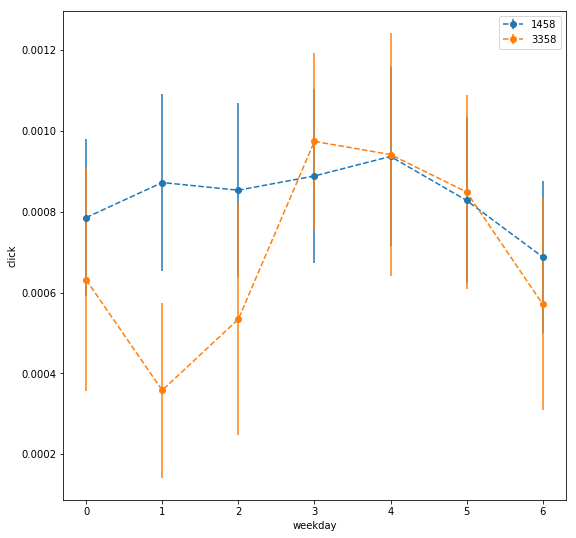

In [10]:
# Plotting 
x= "weekday"
y="click"
list_advert=[1458,3358]
adv="advertiser"
plot_ctr(data,y,x,list_advert)

In [11]:
# Next: Plotting all the other values


### Pareto
#### In Pareto, we can easily see who are the main factors that control the Payprice or the Clicks
- Main conclusions:
    1. 3 out of 9 advertisers (33%) are responsible for 51.9% of the pay prices
    2. 37 out of 370 cities (10%) are responsible for 50.1% of the pay prices
    3. 14 out of 35 regions (40%) are responsible for 71.4% of the click!
    

In [12]:
def pareto(dataframe):
    sumpayprice = data.click.sum()
    for i in dataframe.columns:
        if len(dataframe[i].value_counts()) <= 400 and len(dataframe[i].value_counts())>2 :
            print ("-----------",i,"-----------")
            temp = data.groupby(i)["click"].sum().sort_values(ascending=False)
            temp = temp.to_dict()
            pareto = 0.0
            count = 0.0
            for j in temp:
                count = (count+1)
                countp = (count/len(temp))*100
                pareto = temp[j]/sumpayprice*100 + pareto
                print(j,temp[j],round(temp[j]/sumpayprice*100,2),round(pareto,2),round(countp,2))
                
pareto(data)

----------- weekday -----------
3 345 16.96 16.96 14.29
4 311 15.29 32.25 28.57
5 299 14.7 46.95 42.86
2 298 14.65 61.6 57.14
0 293 14.41 76.01 71.43
1 277 13.62 89.63 85.71
6 211 10.37 100.0 100.0
----------- hour -----------
18 171 8.41 8.41 4.17
0 164 8.06 16.47 8.33
17 154 7.57 24.04 12.5
22 147 7.23 31.27 16.67
16 129 6.34 37.61 20.83
15 123 6.05 43.66 25.0
21 118 5.8 49.46 29.17
19 118 5.8 55.26 33.33
13 115 5.65 60.91 37.5
23 113 5.56 66.47 41.67
20 101 4.97 71.44 45.83
14 93 4.57 76.01 50.0
10 78 3.83 79.84 54.17
11 77 3.79 83.63 58.33
12 75 3.69 87.32 62.5
9 48 2.36 89.68 66.67
8 41 2.02 91.69 70.83
1 41 2.02 93.71 75.0
7 38 1.87 95.58 79.17
2 33 1.62 97.2 83.33
3 21 1.03 98.23 87.5
6 16 0.79 99.02 91.67
5 11 0.54 99.56 95.83
4 9 0.44 100.0 100.0
----------- useragent -----------
windows_ie 1067 52.46 52.46 2.56
windows_chrome 414 20.35 72.81 5.13
android_safari 326 16.03 88.84 7.69
mac_safari 140 6.88 95.72 10.26
mac_other 31 1.52 97.25 12.82
windows_firefox 14 0.69 97.94 15.

### Pivot Table
#### The values shows the clicks each day for each advertiser
- The main points are :
    1. Distribution among days
    2. Some advertisers have no activity in some days
    3. We can easily change weekday to hours and see the distribution during the day and this important because we can profile our customers eg. kids, adults and etc.

In [13]:
pivotable = pd.pivot_table(data, values='click', index=['weekday'],columns=['advertiser'], aggfunc=np.sum)
pivotable

advertiser,1458,2259,2261,2821,2997,3358,3386,3427,3476
weekday,,,,,,,,,
0,66.0,11.0,NaN,71.0,NaN,21.0,50.0,46.0,28.0
1,63.0,14.0,NaN,64.0,NaN,11.0,47.0,43.0,35.0
2,63.0,NaN,NaN,9.0,87.0,14.0,43.0,54.0,28.0
3,68.0,NaN,9.0,NaN,68.0,79.0,49.0,46.0,26.0
4,72.0,NaN,6.0,NaN,69.0,39.0,57.0,44.0,24.0
5,65.0,10.0,17.0,NaN,27.0,50.0,69.0,57.0,4.0
6,54.0,10.0,5.0,NaN,NaN,19.0,43.0,50.0,30.0


In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import time

def win_loss_count(bidding_price,payprice):
    #print "bidding_price: "+str(bidding_price)
    #print "payprice: " + str(payprice)
    if bidding_price>payprice:
        return 1
    else:
        return 0



def count_wins(advertiser,adver_win_count,bidding_price,payprice):
    #print "adver: "+str(advertiser) + " "+str(adver_win_count)
    if advertiser not in adver_win_count.keys():
        adver_win_count[advertiser]=win_loss_count(bidding_price,payprice)
    else:
        adver_win_count[advertiser]+=win_loss_count(bidding_price,payprice)



def evaluate_constant_bid(validation_set,bidding_strategie):

    # Given a validation set and constant bidprice strategy
    k=0
    winning_bids={}

    # Iterating over all advertisers and their payprice:
    for advertiser,payprice in validation_set[["advertiser", "payprice"]].values:
        k+=1
        bidding_price=bidding_strategie[advertiser]
        #print "bidding_price: "+str(bidding_price)
        #print "payprice: " + str(payprice)
        #print "winn: "+str(winning_bids)
        count_wins(advertiser,winning_bids,bidding_price,payprice)
        #print "winning_bids: "+str(winning_bids)
        if k%10000==0:
            print ("%d completed" %(k))
    return winning_bids


if __name__=="__main__":
    time_start = time.clock()

    # Importing data:
    filepath="train.csv"
    training_data=pd.read_csv(filepath)

    # Taking positive clicks
    clicks_training=training_data[training_data["click"] == 1]

    # Constant bid set to the average of the payprice
    constant_bid = dict(clicks_training.groupby("advertiser").mean()["payprice"])

    # Importing validation path:
    validation_path="validation.csv"
    validation_set=pd.read_csv(validation_path)

    # testing constant bid strategie:

    winning_bids = evaluate_constant_bid(validation_set, constant_bid)
    total_bids = dict(validation_set.groupby("advertiser").sum()["logtype"])

    print (clicks_training.shape)

    # time:
    time_elapsed = (time.clock() - time_start)
    print (time_elapsed)

In [14]:
#Click Per Advertiser
CPA = (data.groupby('advertiser')["click"].sum())
#Impression per Advertiser
IPA = (data.groupby('advertiser')["logtype"].sum())
#Bids per Advertiser - Missing -
#Cost
Cost = (data.groupby('advertiser')["payprice"].sum())
#CTR
CTR = (CPA/IPA)*100
#CVR - MISSING -
#CPM
CPM = (Cost/IPA)*1000
#eCPC
eCPC = Cost/CPA

Table3 = [CPA,IPA,Cost,CTR,CPM,eCPC]
Table3 = pd.concat(Table3,axis=1)
Table3.columns = ['Clicks','Impressions','Cost','CTR','CPM','eCPC']
Table3
#all the advertisers has CTR less than 0.1% except for advertiser 2997 (0.46%).
#Although the nine advertisers have similar CPM, their efective cost-per-click (eCPC), i.e. the expected cost for achieving one click, are fairly diferent. This could be caused by the target rule setting (i.e., the target user demographic information, location and time) and the market of each specifc advertiser

,Clicks,Impressions,Cost,CTR,CPM,eCPC
advertiser,,,,,,
1458,451,540293,37231239,0.083473,68909.349186,82552.636364
2259,45,146778,13649026,0.030659,92990.952323,303311.688889
2261,37,120619,10789152,0.030675,89448.196387,291598.702703
2821,144,231416,20625766,0.062226,89128.521796,143234.486111
2997,251,54487,3413227,0.460660,62642.960706,13598.513944
3358,233,304782,28145288,0.076448,92345.637210,120795.227468
3386,358,498554,38341028,0.071808,76904.463709,107097.843575
3427,340,454031,36820111,0.074885,81096.028685,108294.444118
3476,175,346778,27481402,0.050465,79247.824256,157036.582857


## Constant bid
### Assumptions:
    - Gaussian distribution
    - 2 standard deviation should cover 95% of the cases

In [15]:
#Mean of the payprice:
mean = data['payprice'].mean()
#Standard Deviation:
std = data['payprice'].std()
#Constant Bid
constant = mean + 2*std
pay = 0
payold = 0
loss = 0
win = 0
for i in data_val['payprice']:
    if constant < i:
        loss = loss+1
    else:
        win = win+1
        payold = payold + i
        pay = pay+constant
        
print("Auction to lose:",loss,"\nAuctions to win:",win,"\nRatio:",win/len(data_val)*100,"\nPaying:",pay,"Instead of:",payold,"\nPaying more:",pay-payold)

Auction to lose: 19342 
Auctions to win: 280407 
Ratio: 93.5472678807936 
Paying: 57479232.87487122 Instead of: 19388210 
Paying more: 38091022.8749


## Random bid
### The random bid is the most frequent pay price in the training set

In [16]:
#Random Value - most frequent
random = data['payprice'].value_counts().idxmax()
pay = 0
payold = 0
loss = 0
win = 0
for i in data_val['payprice']:
    if random < i:
        loss = loss+1
    else:
        win = win+1
        payold = payold + i
        pay = pay+random
        
print("Auction to lose:",loss,"\nAuctions to win:",win,"\nRatio:",win/len(data_val)*100,"\nPaying:",pay,"Instead of:",payold,"\nPaying more:",pay-payold)

Auction to lose: 132983 
Auctions to win: 166766 
Ratio: 55.63521479637964 
Paying: 11673620 Instead of: 6438422 
Paying more: 5235198
